In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Import the data file using collab
from google.colab import files
uploaded = files.upload()


Saving forestfires (2).csv to forestfires (2).csv


In [5]:
forest = pd.read_csv("forestfires (2).csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
data =  forest.iloc[:,:11]
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [11]:
# Turn all categories into numbers
df = pd.get_dummies(data)
df.head() # view the converted columns

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
# Create X & y values
X = df.drop("area", axis=1)
Y = df["area"]
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_apr,month_aug,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
X.isnull().sum()

FFMC         0
DMC          0
DC           0
ISI          0
temp         0
RH           0
wind         0
rain         0
month_apr    0
month_aug    0
month_dec    0
month_feb    0
month_jan    0
month_jul    0
month_jun    0
month_mar    0
month_may    0
month_nov    0
month_oct    0
month_sep    0
day_fri      0
day_mon      0
day_sat      0
day_sun      0
day_thu      0
day_tue      0
day_wed      0
dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[1:10,:]

array([[-8.10203395e-03, -1.17954077e+00,  4.88890915e-01,
        -5.09688269e-01, -1.53278265e-01, -6.92456280e-01,
        -1.74175564e+00, -7.32683096e-02, -1.33103476e-01,
        -7.43338787e-01, -1.33103476e-01, -2.00602714e-01,
        -6.23176953e-02, -2.56864520e-01, -1.84390889e-01,
        -3.41512327e-01, -6.23176953e-02, -4.40225453e-02,
         5.78503817e+00, -7.06081245e-01, -4.43575540e-01,
        -4.08708808e-01, -4.40449068e-01, -4.74466525e-01,
        -3.65748452e-01,  2.66047458e+00, -3.41512327e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01,
        -5.09688269e-01, -7.39383408e-01, -6.92456280e-01,
        -1.51828184e+00, -7.32683096e-02, -1.33103476e-01,
        -7.43338787e-01, -1.33103476e-01, -2.00602714e-01,
        -6.23176953e-02, -2.56864520e-01, -1.84390889e-01,
        -3.41512327e-01, -6.23176953e-02, -4.40225453e-02,
         5.78503817e+00, -7.06081245e-01, -4.43575540e-01,
        -4.08708808e-01,  2.27041007e+00, -4.74466525e-

In [24]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

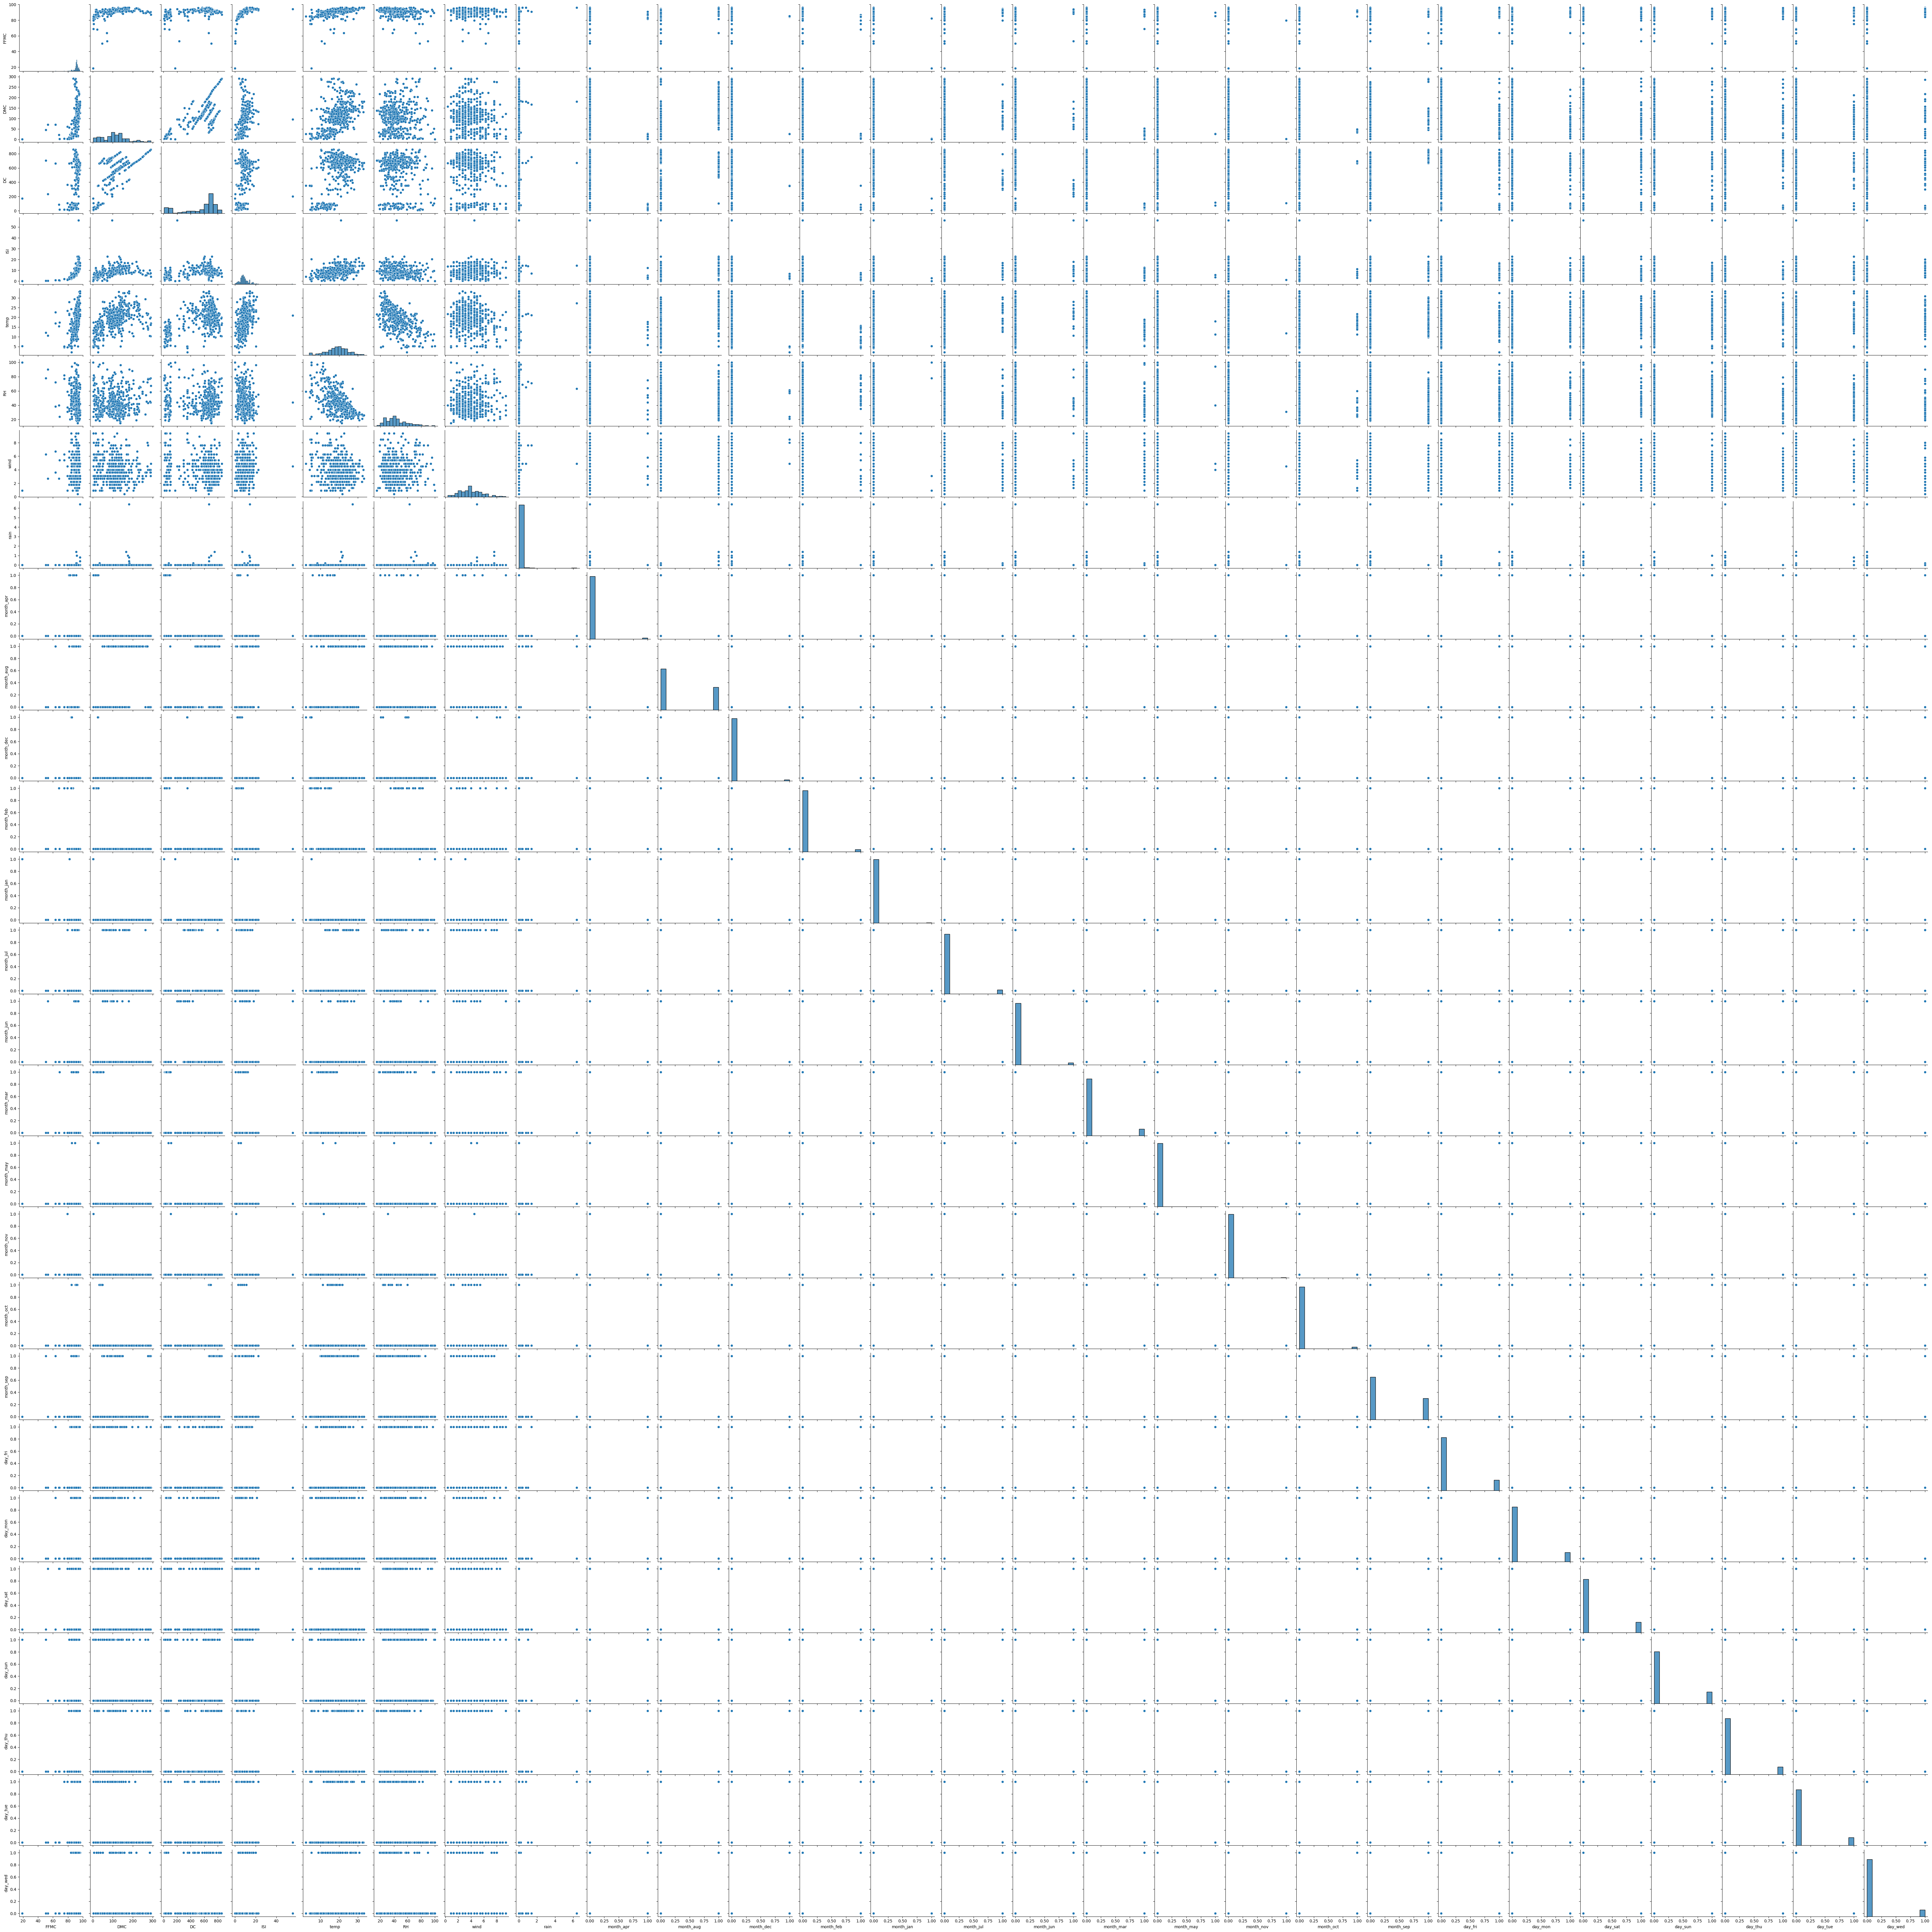

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(X)
plt.show()

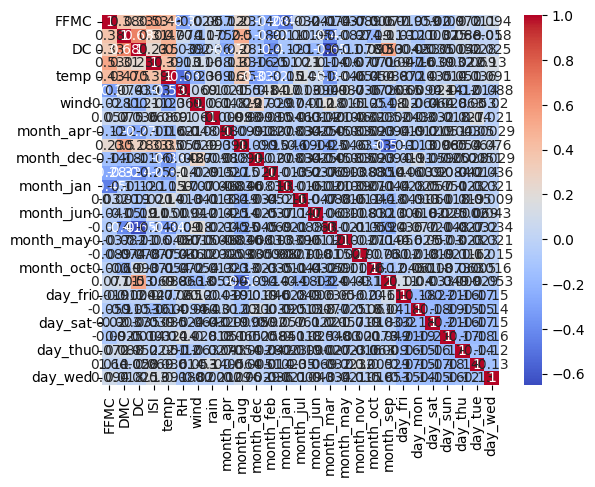

In [19]:
# Calculate correlation matrix
correlation_matrix = X.corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

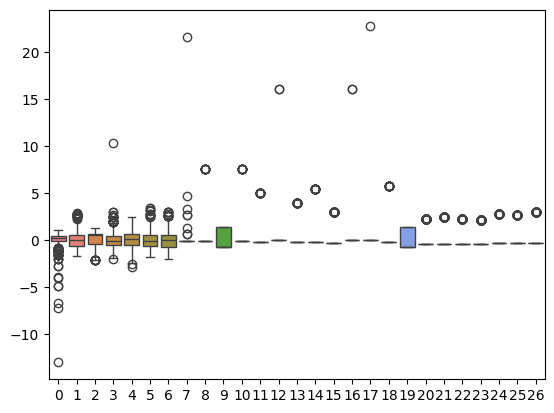

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_apr,month_aug,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
import numpy as np

sns.boxplot(data=X_scaled)
plt.show()
X.head()


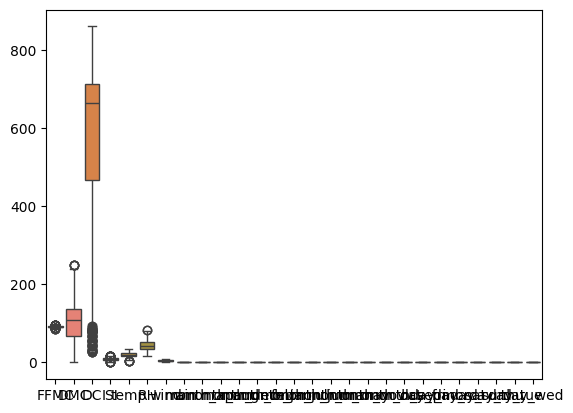

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_apr,month_aug,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,42.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,89.3,51.3,102.2,9.6,11.4,42.0,1.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:

import numpy as np
def replace_outliers_with_median(df, columns):
  for column in columns:
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_limit = df[column].quantile(0.25) - 1.5 * IQR
    upper_limit = df[column].quantile(0.75) + 1.5 * IQR
    df[column] = np.where(
        (df[column] < lower_limit) | (df[column] > upper_limit),
        df[column].median(),
        df[column]
    )
  return df

X = replace_outliers_with_median(X, X.columns)
sns.boxplot(data=X)
plt.show()
X.head()

In [26]:
from sklearn.linear_model import Lasso, Ridge


ridge = Ridge(alpha=2.0)
ridge.fit(X_scaled, Y)
print("Ridge coefficients:", ridge.coef_)


lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, Y)
print("Lasso coefficients:", lasso.coef_)


Ridge coefficients: [ -0.40090737  11.6670216  -26.49979147  -2.07880303   7.90099911
  -1.36418207   3.57063287  -0.58938314  -4.03798062   0.64736937
   1.04273591  -5.20508778  -1.49502908  -2.76782342  -5.03236381
 -11.5516105   -1.35288607  -1.51353979   4.12092899  12.17058706
  -2.96498165  -0.43092005   4.47660531  -1.13568117   0.75670804
  -0.05320421  -0.61549555]
Lasso coefficients: [ -0.          10.65829731 -22.12053613  -1.88503336   7.80480307
  -1.24240705   3.46587058  -0.52219446  -2.95871577   0.
   1.30530814  -3.66829419  -0.8551742   -2.28943693  -4.24059385
  -9.29061701  -0.83145771  -1.0947884    3.45484308  10.60854192
  -2.47401723   0.           4.87306435  -0.5317506    1.05568402
   0.28546258  -0.17305975]


In [27]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     features  VIF Factor
0        FFMC    2.279273
1         DMC    3.835066
2          DC   26.258272
3         ISI    1.811602
4        temp    4.499564
5          RH    2.768953
6        wind    1.277300
7        rain    1.088296
8   month_apr         inf
9   month_aug         inf
10  month_dec         inf
11  month_feb         inf
12  month_jan         inf
13  month_jul         inf
14  month_jun         inf
15  month_mar         inf
16  month_may         inf
17  month_nov         inf
18  month_oct         inf
19  month_sep         inf
20    day_fri         inf
21    day_mon         inf
22    day_sat         inf
23    day_sun         inf
24    day_thu         inf
25    day_tue         inf
26    day_wed         inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [28]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(413, 27) (104, 27) (413,) (104,)


In [31]:
# Set random seed
#tf.random.set_seed(42)

# Create a new model (same as model_2)
forestfires = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
forestfires.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

In [32]:
# Fit the model
forestfires.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 6ms/step - loss: 11.5881 - mae: 11.5881
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 11.4190 - mae: 11.4190
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 11.3011 - mae: 11.3011
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 11.2185 - mae: 11.2185
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 11.1669 - mae: 11.1669
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 11.1453 - mae: 11.1453
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 11.1306 - mae: 11.1306
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 11.1208 - mae: 11.1208
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 11.1144 - mae: 11.1144
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 11.1081 - mae: 11.1081
Epoch 11/100
13/13 [===================

In [34]:
mae_values = forestfires.history.history['mae']
len(mae_values)

100

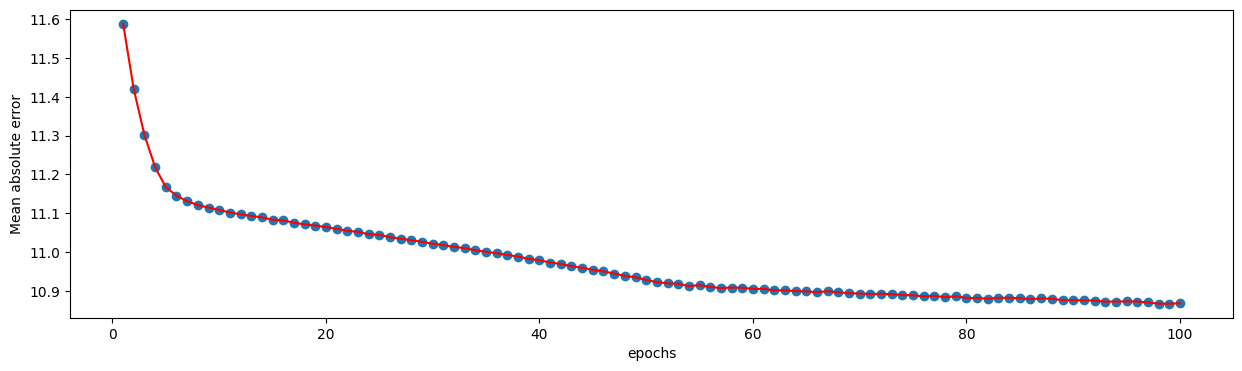

In [35]:
# see the error how it is reduced to minimum times for epoch=5
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()

In [36]:
# Set random seed
tf.random.set_seed(24)

# Add an extra layer and increase number of units
forestfires_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10), # 100 units
  tf.keras.layers.Dense(15), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
forestfires_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

#forestfires_2.compile(loss=tf.keras.losses.mae,
#                          optimizer=tf.keras.optimizers.SGD(), # Adam works but SGD doesn't
#                          metrics=['mae'])



In [37]:
# Fit the model and save the history (we can plot this)
forestfires_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 11.5564 - mae: 11.5564
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 11.3968 - mae: 11.3968
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 11.2779 - mae: 11.2779
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 11.1873 - mae: 11.1873
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 11.1411 - mae: 11.1411
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 11.1150 - mae: 11.1150
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 11.1021 - mae: 11.1021
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 11.0908 - mae: 11.0908
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 11.0819 - mae: 11.0819
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 11.0759 - mae: 11.0759
Epoch 11/100
13/13 [===================

In [39]:
# prompt: show me the .compile all hyper parameters

forestfires_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

print(forestfires_2.compile)

<bound method Model.compile of <keras.src.engine.sequential.Sequential object at 0x7e13cb7faf50>>


In [40]:
mae_values = forestfires_2.history.history['mae']
len(mae_values)

100

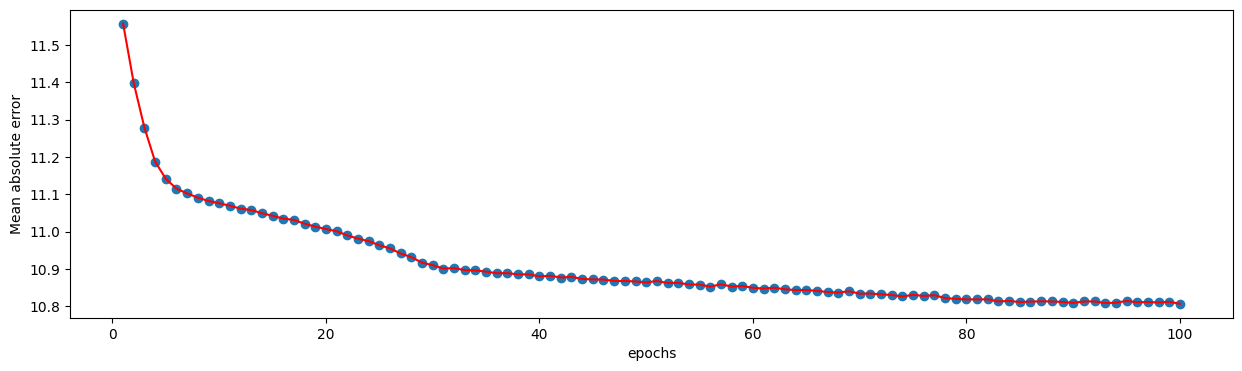

In [41]:
# see the error how it is reduced to minimum times for epoch=5
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()


In [43]:
forestfires_2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 7ms/step - loss: 19.9279 - mae: 19.9279


[19.927928924560547, 19.927928924560547]

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 11.6215 - mae: 11.6215
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 11.4997 - mae: 11.4997
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 11.4145 - mae: 11.4145
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 11.3456 - mae: 11.3456
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 11.2888 - mae: 11.2888
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 11.2402 - mae: 11.2402
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 11.2003 - mae: 11.2003
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 11.1696 - mae: 11.1696
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 11.1462 - mae: 11.1462
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 11.1250 - mae: 11.1250
Epoch 11/100
13/13 [===================

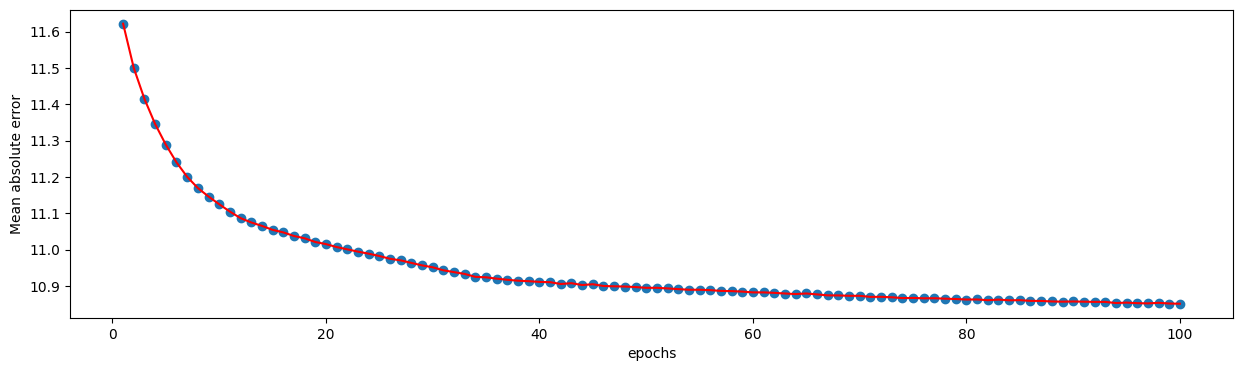

In [45]:
#tf.keras.optimizers.RMSprop()

import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
forestfires = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
forestfires.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.RMSprop(),
                        metrics=['mae'])
# Fit the model
forestfires.fit(X_train, y_train, epochs=100)
mae_values = forestfires.history.history['mae']
len(mae_values)
# see the error how it is reduced to minimum times for epoch=5
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()


Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 11.6187 - mae: 11.6187
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 11.6186 - mae: 11.6186
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 11.6184 - mae: 11.6184
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 11.6183 - mae: 11.6183
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 11.6181 - mae: 11.6181
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 11.6180 - mae: 11.6180
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 11.6178 - mae: 11.6178
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 11.6177 - mae: 11.6177
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 11.6175 - mae: 11.6175
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 11.6174 - mae: 11.6174
Epoch 11/100
13/13 [===================

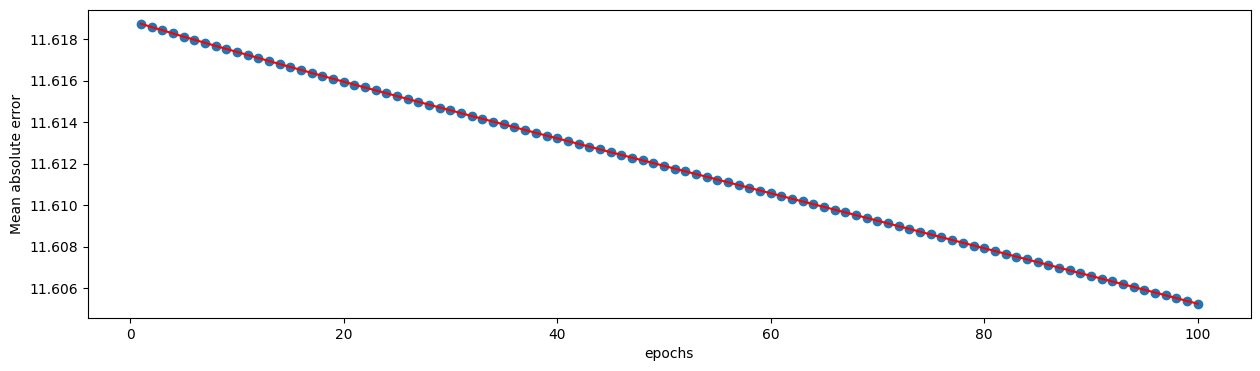

In [46]:
#  tf.keras.optimizers.Adadelta()

import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
forestfires = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
forestfires.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adadelta(),
                        metrics=['mae'])
# Fit the model
forestfires.fit(X_train, y_train, epochs=100)
mae_values = forestfires.history.history['mae']
len(mae_values)
# see the error how it is reduced to minimum times for epoch=5
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()


Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 11.9747 - mae: 11.9747
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 11.9296 - mae: 11.9296
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 11.8976 - mae: 11.8976
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 11.8710 - mae: 11.8710
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 11.8487 - mae: 11.8487
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 11.8289 - mae: 11.8289
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 11.8119 - mae: 11.8119
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 11.7964 - mae: 11.7964
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 11.7820 - mae: 11.7820
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 11.7684 - mae: 11.7684
Epoch 11/100
13/13 [===================

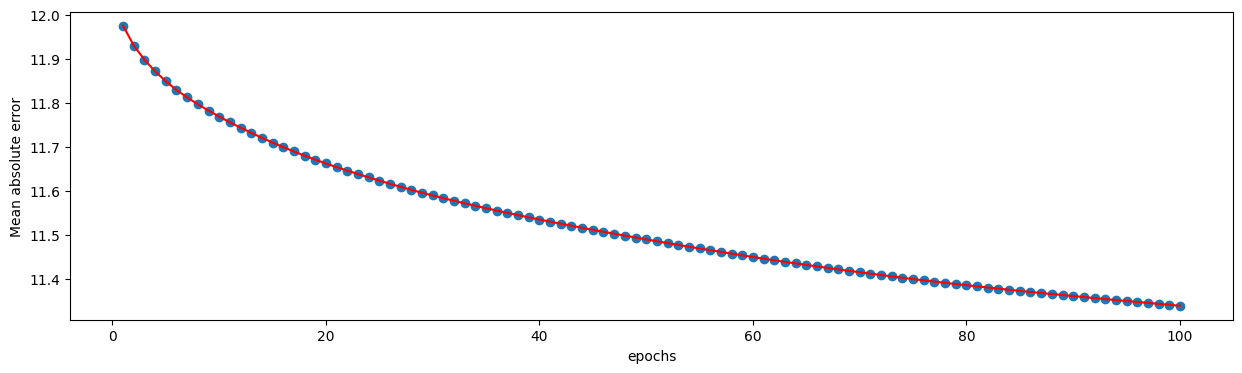

In [47]:
#tf.keras.optimizers.Adagrad()

import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
forestfires = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
forestfires.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adagrad(),
                        metrics=['mae'])
# Fit the model
forestfires.fit(X_train, y_train, epochs=100)
mae_values = forestfires.history.history['mae']
len(mae_values)
# see the error how it is reduced to minimum times for epoch=5
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()


Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 11.6418 - mae: 11.6418
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 11.5662 - mae: 11.5662
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 11.5089 - mae: 11.5089
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 11.4566 - mae: 11.4566
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 11.4099 - mae: 11.4099
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 11.3660 - mae: 11.3660
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 11.3275 - mae: 11.3275
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 11.2928 - mae: 11.2928
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 11.2613 - mae: 11.2613
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 11.2317 - mae: 11.2317
Epoch 11/100
13/13 [===================

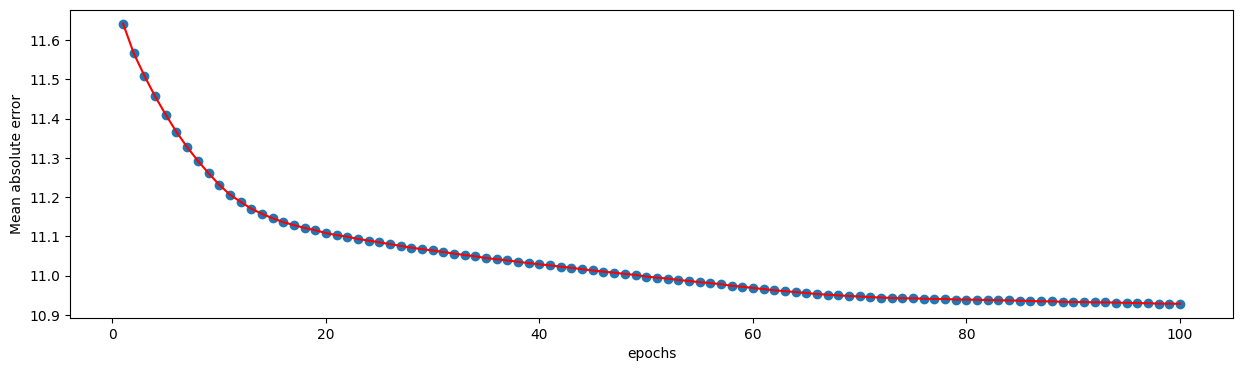

In [48]:
#tf.keras.optimizers.Adamax()

import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
forestfires = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
forestfires.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adamax(),
                        metrics=['mae'])
# Fit the model
forestfires.fit(X_train, y_train, epochs=100)
mae_values = forestfires.history.history['mae']
len(mae_values)
# see the error how it is reduced to minimum times for epoch=5
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()



Epoch 1/100
13/13 [==============================] - 2s 4ms/step - loss: 11.7154 - mae: 11.7154
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 11.6150 - mae: 11.6150
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 11.5086 - mae: 11.5086
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 11.4269 - mae: 11.4269
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 11.3540 - mae: 11.3540
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 11.2941 - mae: 11.2941
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 11.2463 - mae: 11.2463
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 11.2088 - mae: 11.2088
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 11.1775 - mae: 11.1775
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 11.1546 - mae: 11.1546
Epoch 11/100
13/13 [===================

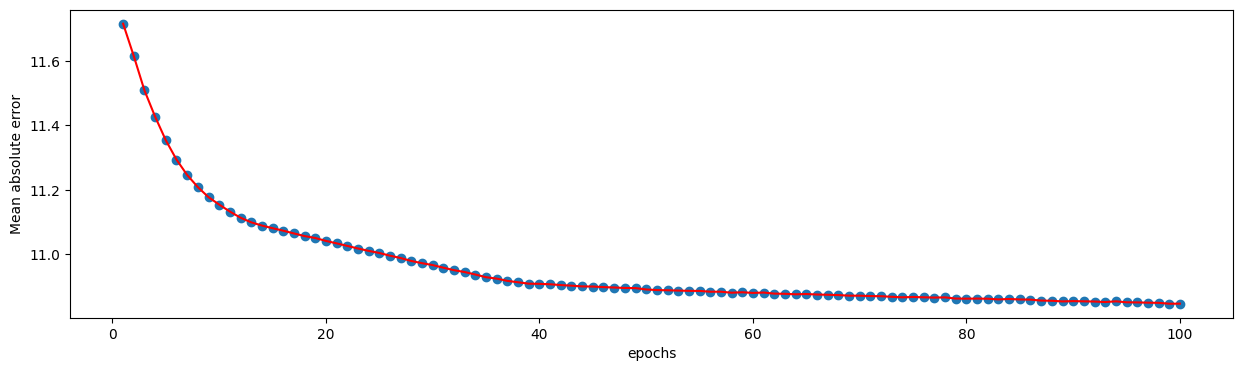

In [50]:
#  tf.keras.optimizers.Nadam()

import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
forestfires = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
forestfires.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Nadam(),
                        metrics=['mae'])
# Fit the model
forestfires.fit(X_train, y_train, epochs=100)
mae_values = forestfires.history.history['mae']
len(mae_values)
# see the error how it is reduced to minimum times for epoch=5
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()



Epoch 1/100
13/13 [==============================] - 1s 8ms/step - loss: 11.2587 - mae: 11.2587
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 11.1700 - mae: 11.1700
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 11.1656 - mae: 11.1656
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 11.1621 - mae: 11.1621
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 11.1591 - mae: 11.1591
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 11.1565 - mae: 11.1565
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 11.1542 - mae: 11.1542
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 11.1521 - mae: 11.1521
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 11.1501 - mae: 11.1501
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 11.1482 - mae: 11.1482
Epoch 11/100
13/13 [===================

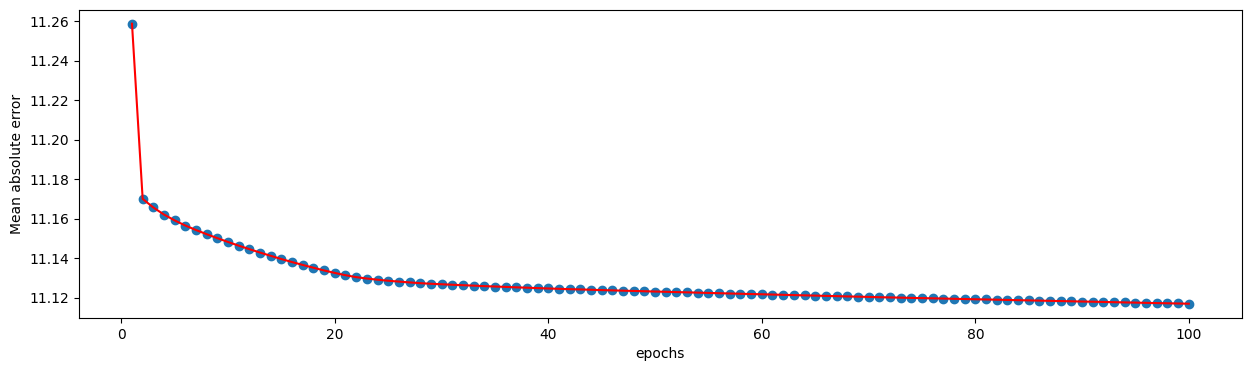

In [51]:
# tf.keras.optimizers.Ftrl()

import matplotlib.pyplot as plt
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
forestfires = tf.keras.Sequential([
  tf.keras.layers.Dense(11),
  tf.keras.layers.Dense(1)
])

# Compile the model
forestfires.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Ftrl(),
                        metrics=['mae'])
# Fit the model
forestfires.fit(X_train, y_train, epochs=100)
mae_values = forestfires.history.history['mae']
len(mae_values)
# see the error how it is reduced to minimum times for epoch=5
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()

